In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error,classification_report
from sklearn.linear_model import LinearRegression


In [3]:
#Load the CSV file
path="/content/drive/My Drive/csv/Cellphone.csv"

In [4]:
df = pd.read_csv(path)
df.head(5)

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [5]:
df

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


In [6]:

#Check null value
df.isnull().sum()



,0
Product_id,0
Price,0
Sale,0
weight,0
resoloution,0
ppi,0
cpu core,0
cpu freq,0
internal mem,0
ram,0


In [10]:
#correlation matrix
df.corr()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
Product_id,1.000000,0.165136,0.218548,0.035869,-0.017817,0.207271,-0.008634,0.092428,0.261186,0.236194,0.172812,0.071020,0.031745,0.039807
Price,0.165136,1.000000,0.273263,0.144555,0.404010,0.817614,0.686811,0.727383,0.776738,0.896915,0.739538,0.675286,0.559946,-0.716773
Sale,0.218548,0.273263,1.000000,0.016114,0.017154,0.235896,0.069517,0.099133,0.489308,0.373127,0.292164,0.437233,0.120338,-0.047991
weight,0.035869,0.144555,0.016114,1.000000,0.890416,-0.054683,0.216257,0.222730,0.098849,0.149283,-0.029448,-0.005971,0.833783,-0.185262
resoloution,-0.017817,0.404010,0.017154,0.890416,1.000000,0.181292,0.472226,0.505454,0.202660,0.327216,0.249892,0.202720,0.843462,-0.533708
ppi,0.207271,0.817614,0.235896,-0.054683,0.181292,1.000000,0.487990,0.713168,0.618560,0.748724,0.774008,0.491371,0.302517,-0.496791
cpu core,-0.008634,0.686811,0.069517,0.216257,0.472226,0.487990,1.000000,0.491519,0.276251,0.483128,0.611353,0.586698,0.459728,-0.697935
cpu freq,0.092428,0.727383,0.099133,0.222730,0.505454,0.713168,0.491519,1.000000,0.441400,0.633547,0.625104,0.358319,0.473137,-0.614458
internal mem,0.261186,0.776738,0.489308,0.098849,0.202660,0.618560,0.276251,0.441400,1.000000,0.875354,0.451917,0.555733,0.461506,-0.367412
ram,0.236194,0.896915,0.373127,0.149283,0.327216,0.748724,0.483128,0.633547,0.875354,1.000000,0.648073,0.647470,0.541001,-0.521074


<Axes: >

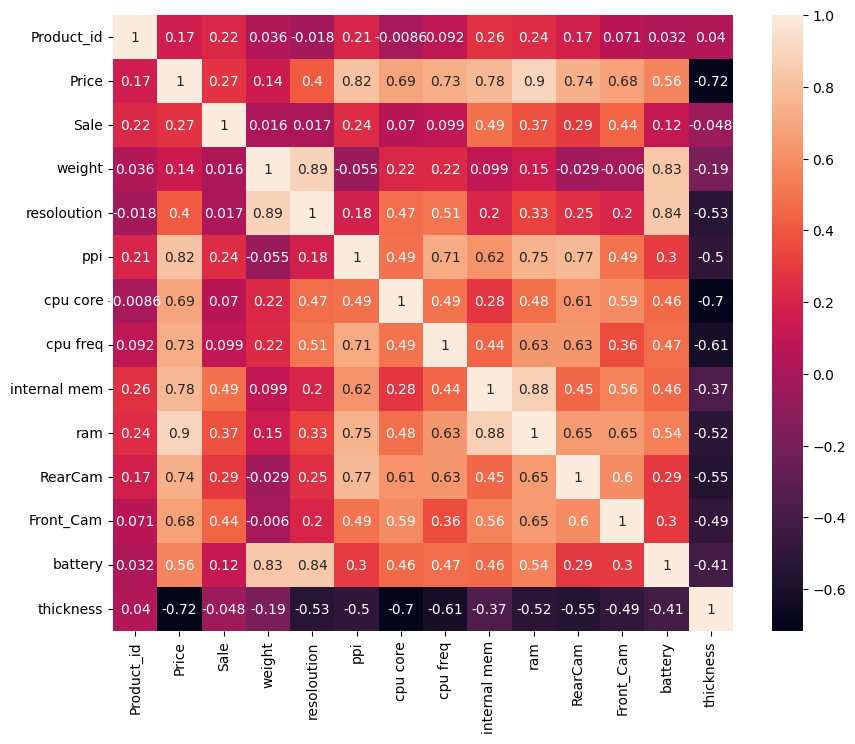

In [11]:
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)

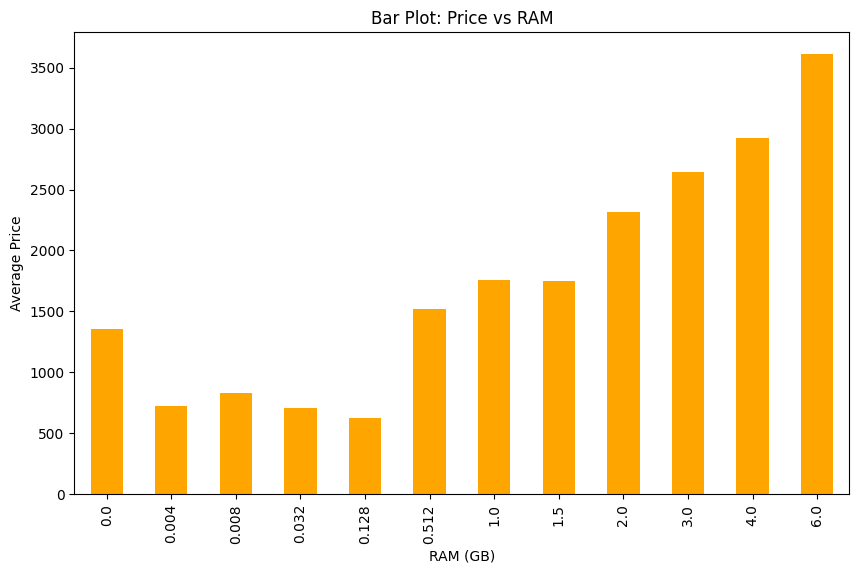

In [14]:
# Bar Plot: Price vs RAM
plt.figure(figsize=(10, 6))
df.groupby('ram')['Price'].mean().plot(kind='bar', color='orange')
plt.title('Bar Plot: Price vs RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Average Price')
plt.show()


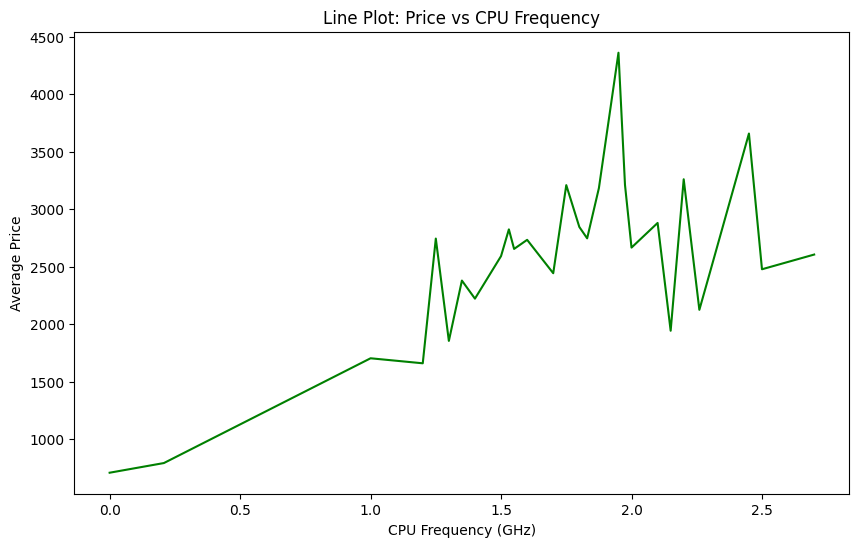

In [13]:
# Line Plot: Price vs CPU Frequency
plt.figure(figsize=(10, 6))
df.groupby('cpu freq')['Price'].mean().plot(kind='line', color='green')
plt.title('Line Plot: Price vs CPU Frequency')
plt.xlabel('CPU Frequency (GHz)')
plt.ylabel('Average Price')
plt.show()


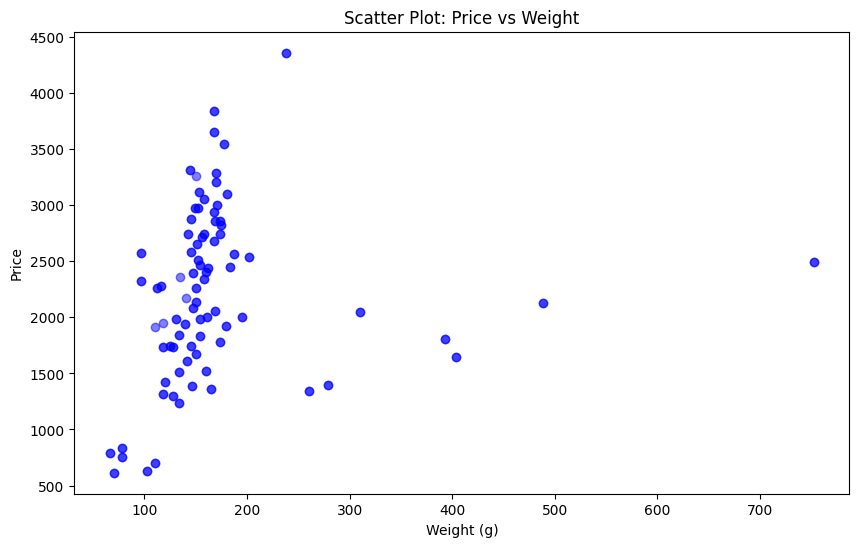

In [21]:
# Scatter Plot: Price vs Weight
plt.figure(figsize=(10, 6))
plt.scatter(df['weight'], df['Price'], color='blue', alpha=0.5)
plt.title('Scatter Plot: Price vs Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Price')
plt.show()


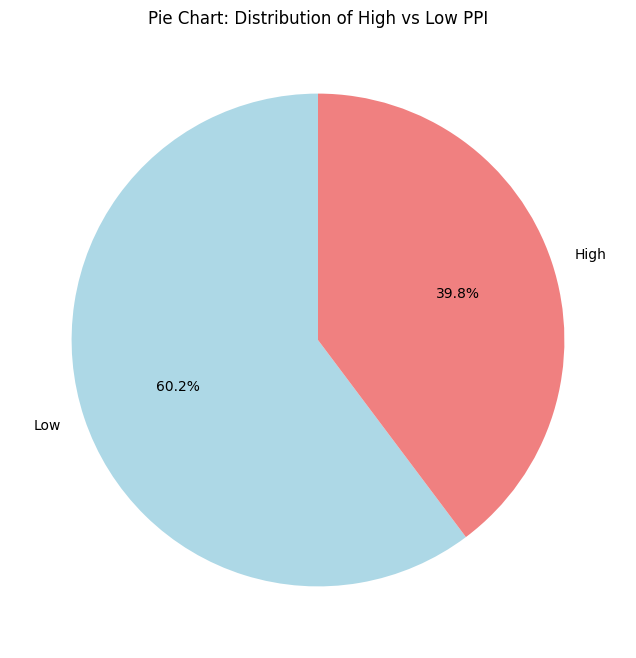

In [16]:
# Pie Chart: Distribution of Price based on PPI
plt.figure(figsize=(8, 8))
df['ppi'].apply(lambda x: 'High' if x > 400 else 'Low').value_counts().plot(kind='pie',
autopct='%1.1f%%',colors=['lightblue', 'lightcoral'], startangle=90)
plt.title('Pie Chart: Distribution of High vs Low PPI')
plt.ylabel('')
plt.show()
# higher PPI may command higher prices,
#products with high PPI (greater than 400) vs low PPI (less than or equal to 400).

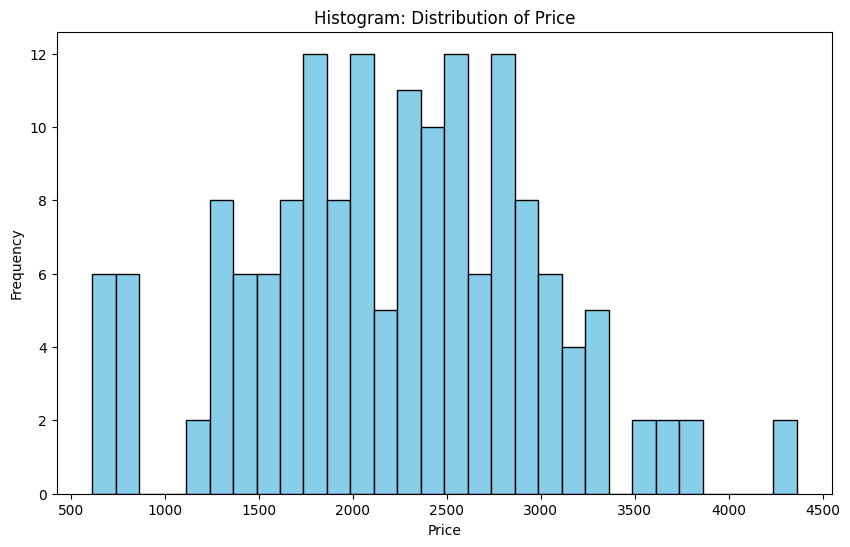

In [20]:
# Histogram: Distribution of Price
plt.figure(figsize=(10, 6))
df['Price'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram: Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


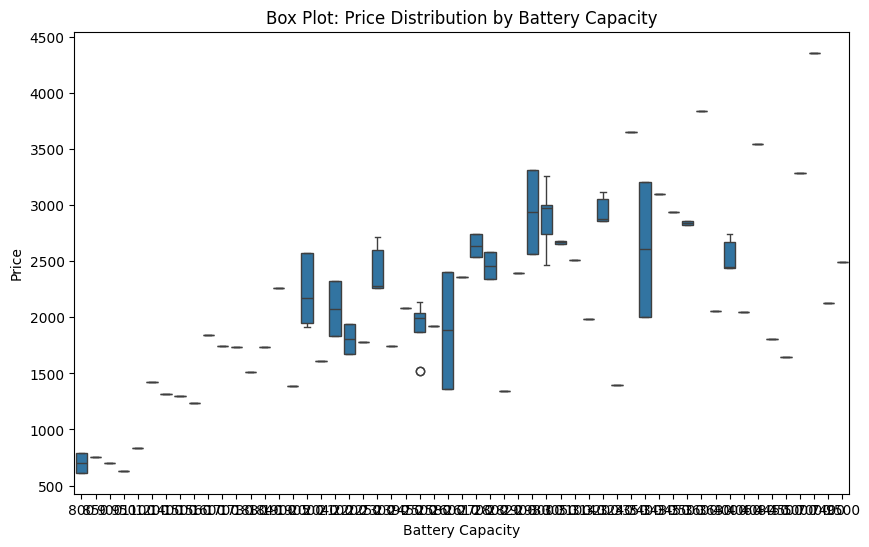

In [22]:
# Box Plot: Price Distribution by Battery Capacity
plt.figure(figsize=(10, 6))
sns.boxplot(x='battery', y='Price', data=df)
plt.title('Box Plot: Price Distribution by Battery Capacity')
plt.xlabel('Battery Capacity')
plt.ylabel('Price')
plt.show()


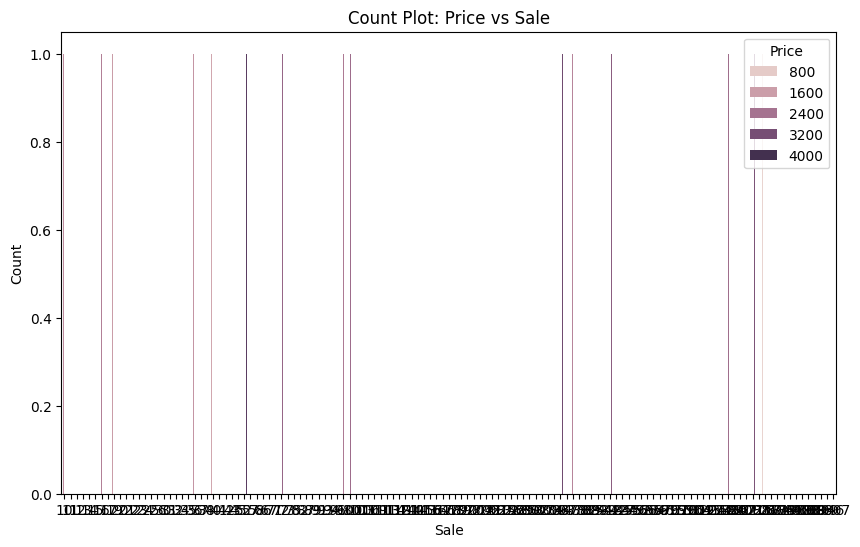

In [23]:
# Count Plot: Price vs Sale
plt.figure(figsize=(10, 6))
sns.countplot(x='Sale', data=df, hue='Price')
plt.title('Count Plot: Price vs Sale')
plt.xlabel('Sale')
plt.ylabel('Count')
plt.show()


# **Linear Regression**

In [27]:
x = df.drop(columns = ['Price'])
y = df['Price']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train)
print(y_train)
print(x_test)
print(y_test)

     Product_id  Sale  weight  resoloution  ppi  cpu core  cpu freq  \
115         637   309   174.0          5.7  513         4     1.875   
2            40    10   110.0          4.7  312         4     1.200   
123        1327   399   194.8          5.7  258         4     1.200   
45          739    40   131.0          5.0  294         4     1.300   
42          162    38   133.5          4.5  218         4     1.300   
..          ...   ...     ...          ...  ...       ...       ...   
71           14    91   116.0          5.0  294         8     1.500   
106         133   214   142.0          5.0  440         8     1.250   
14         1103    16   145.0          5.1  432         4     2.500   
92          131   156   154.0          5.0  294         4     1.200   
102         183   204   160.0          5.0  220         2     1.200   

     internal mem  ram  RearCam  Front_Cam  battery  thickness  
115          32.0  4.0     16.0        5.0     3200        7.6  
2             8.0

In [29]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)

In [30]:
#LR Error
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))

print('MAE Linear Regression: ', lr_mae)
print('MSE Linear Regression: ', lr_mse)
print('RMSE Linear Regression: ', lr_rmse)

MAE Linear Regression:  130.3153096103075
MSE Linear Regression:  23062.22989175004
RMSE Linear Regression:  151.86253616922787
